___
# Atividade: Teoria da Probabilidade
___

## Aula 08

**Referência de Leitura:**
1. Magalhães e Lima (7ª. Edição): pág. 49 a 68 - Probabilidades

**Hoje:**
1. Conceito de Probabilidade
4. Probabilidade Condicional
3. Independência de eventos
5. Teorema de Bayes. Simulação do problema de Monty Hall

**Próxima aula:**
1. Magalhães e Lima (7ª. Edição): pág. 69 a 104 - Variáveis aleatórias discretas
___

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

#Bibliotecas necessárias
from numpy.random import shuffle, randint, choice


## <font color='blue'>Exercício 1</font>

Monte a simulação de 1000 jogadas de um dado idôneo de 6 faces. Faça o histograma (normalizado) da frequência.

    a) Olhando o histograma, o que pode se dizer sobre as probabilidade de cada face?
    
    b) Discorra sobre o porque da probabilidade não ser exatamente igual à teórica.

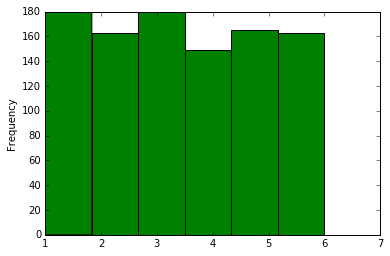

In [2]:
x = pd.Series(randint(1,7, size=1000))
plot = x.plot.hist(bins=6, color="green")

Ela não é exatamente igual a teoria porque não depende só do fator matematico, depende tambem do angulo em que o dado foi lançado, a força, a velocidade, o peso da moeda... Ou seja, sempre tem algum fato que pode ter algum erro matematico que não foi considerado, então ele tente a ter o mesmo valor.

___
## <font color='blue'>Exercício 2</font>

Ampliando o espaço amostral para as possíveis jogadas de 2 dados, analise as seguintes situações:
    
    a) Jogando os dois dados ao mesmo tempo. Qual é a probabilidade de obter soma 7?
    
    b) Jogando um dado e depois o segundo dado. Qual é a probabilidade de obter soma 7 já sabendo o resultado do primeiro? Compare o resultado com item anterior! Por que é igual ou diferente?

In [3]:
#Pela definição de proabilidade: P(A,B) = P(A).P(B), portanto
#A probabilidade de obter a soma 7 é: (1,6);(2,5);(3,4);(4,3);(5,2);(6,1)

acerto = 0
erro = 0
for i in range(1000001):
    dado1 = randint(1,7)
    dado2 = randint(1,7)
    soma = dado1 + dado2
    if soma == 7:
        acerto += 1
    elif soma != 7:
        erro += 1
    soma = 0
acerto_porcentagem = (acerto/1000)
print(acerto_porcentagem)
erro_porcentagem = (erro/1000)
print(erro_porcentagem)


166.622
833.379


Caso o segundo dado fosse jogado depois de saber o resultado do primeiro, irá continuar dando 1/6, pois o resultado de um dado não é depende do outro, então jogando os dois ao mesmo tempo, ou um seguida do outro, a soma ser 7 continuará dando 1/6.

___
## <font color='blue'>Exercício 3</font>

Simule 10000 vezes o problema de Monty Hall¹ , usar o seguinte algoritmo:


* Repetir 10000 vezes:
    * Sorteie um número de porta de 1 a 3 para ser a premiada
    * Sorteie um número de porta de 1 a 3 para ser a porta escolhida.
    * Sorteie um número de porta para ser a aberta, desde que não seja a premiada e nem a porta escolhida. Assim, se:
        * porta premiada é 1 e a escolhida é 1, sorteie entre as portas 2 e 3 para ser aberta
        * porta premiada é 1 e a escolhida é 2, com probabilidade 1 deve abrir a porta 3
        * porta premiada é 1 e a escolhida é 3, com probabilidade 1 deve abrir a porta 2
        * assim para demais casos...
    
    * Calcule quantas vezes indivíduo ganha ao trocar de porta. Ou seja, se:
        * porta premiada é 1, a escolhida é 1 e aberta é 2 (ou 3), indivíduo perde se trocar de porta
        * porta premiada é 1, a escolhida é 2 e aberta é 3, indivíduo ganha se trocar de porta
        * porta premiada é 1, a escolhida é 3 e aberta é 2, indivíduo ganha se trocar de porta
        * assim para demais casos...
        
    * Exibir quantas vezes em 10000, o indivíduo ganhou ao trocar de porta.

Compare o resultado numérico com o resultado analítico obtido via Teorema de Bayes.

¹https://en.wikipedia.org/wiki/Monty_Hall_problem e 
Exercício 1.4.5 de http://www.portalaction.com.br/probabilidades/14-eventos-independentes-e-probabilidade-condicional

In [361]:
import random
interacoes = 10000

opcoes = ["R$10,00", "R$10,00", "R$1M,00"]
vitorias = 0.0
derrotas = 0.0

for i in range(interacoes):
    n = random.randrange(0,3)

    escolhas = opcoes[n]
    
    if n == 0:
        derrotas += 1
        
    elif n == 1:
        derrotas += 1
        
    elif n == 2:
        vitorias += 1
        
    else:
        print("Ja era!")

t = (vitorias/interacoes) * 100
print("Vitorias: " + str(vitorias))
print("Derrotas: " + str(derrotas))
print("Porcentagem de vitorias (em %): " + str(t))

Vitorias: 3386.0
Derrotas: 6614.0
Porcentagem de vitorias (em %): 33.86


In [314]:
import numpy.random 
ganha = 0
perde = 0
#lista = ["x","y","z"]

for i in range(100000):
    lista = ["x","y","z"]

    escolha = random.choice(lista)
    premiado = random.choice(lista)
    temp = list(lista)
    abrir = list(temp)
    
    
    if escolha == premiado:
        temp.remove(escolha)
        aleatorio = random.choice(temp)
        temp.remove(aleatorio)
        abrir = random.choice(temp)
        
        if premiado == escolha:
            ganha += 1          
        
        if premiado != escolha:
            lista.remove(abrir)
            lista.remove(escolha)
            nova_opcao = lista[0]
    
            if nova_opcao == premiado:
                ganha += 1
            elif nova_opcao != premiado:
                perde += 1
    
    elif escolha != premiado:
        temp.remove(escolha)
        temp.remove(premiado)
        abrir = random.choice(temp)
    
        if premiado == escolha:
            ganha += 1          
        
        if premiado != escolha:
            lista.remove(abrir)
            lista.remove(escolha)
            nova_opcao = lista[0]
    
            if nova_opcao == premiado:
                ganha += 1
            elif nova_opcao != premiado:
                perde += 1
                
#print("Voce escolheu: {0}".format(escolha))
#print("O premiado era: {0}".format(premiado))
#print("A porta aberta tinha: {0}".format(temp)) 
#print("Sua nova opção foi de: {0}".format(lista[0]))
print(ganha/100000)
print()
print(perde/100000)

1.0

0.0


Existem 3 opções "fechadas" (A,B,C), uma pessoa escolhe uma das opções, digamos a A, a chance de que ela seja a premiada é de 1/3. Como conseqüência, a probabilidade de que o prêmio esteja nas outras duas portas B ou C é de 2/3. Portanto, a chances são: de ter acertado = 1/3, de ter errado = 2/3.

Uma outra pessoa, geralmente um apresentador, abrirá uma dessas outras duas portas que contém não contem o premio, por exemplo a B. Dando, então, a informação de: se o prêmio estava nas outras portas que não escolheu (B ou C), agora ele tem certeza de que não esta na B, pensando que o premio só pode estar na porta que você não escolheu e não foi aberta, ou seja, a porta C. 

Sabendo que a porta aberta (no caso, B) não é a premiada, então as chances da pessoa acertar (1/3), se tornam 2/3, se ele trocar de porta. Resumindo, inicialmente suas chances de ganhar são de 1/3, e ao saber uma das portas, caso ele tenha trocado de porta, suas chances passam a ser 2/3